### Retail Sales Analysis Project

Overview
- The Retail Sales Analysis project aims to explore and analyze a retail sales dataset using Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn. 
- The analysis includes data preprocessing, exploratory data analysis (EDA), and advanced visualizations to derive insights regarding sales trends, customer demographics, and product performance.

- Pandas: For data manipulation and analysis.
- NumPy: For numerical operations.
- Matplotlib: For data visualization.
- Seaborn: For statistical data visualization.


In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data1 = pd.read_csv('retail_sales_dataset.csv')

# show the top five cloumns of the dataset
data1.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Data Preprocessing

1. Describing the dataset to understand its structure.
2. Converting date columns to a datetime format.
3. Adding a 'Month' column for monthly analysis.
4. Handling missing values by filling them with zeros.
5. Detecting and filtering outliers using the Interquartile Range (IQR) method.


In [10]:
# Describe the dataset
data1.describe

<bound method NDFrame.describe of      Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount    Month 

In [11]:
# Illustrate the necessary information from the relavent data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   period[M]     
dtypes: datetime64[ns](1), int64(5), object(3), period[M](1)
memory usage: 78.3+ KB


In [3]:
# Convert 'Date' column to datetime format
data1['Date'] = pd.to_datetime(data1['Date'])
 

In [4]:
# Add a 'Month' column for monthly analysis
data1['Month'] = data1['Date'].dt.to_period('M')

### Data Wrangling and Cleaning

In [5]:
# Handling missing values
data1.fillna(0, inplace=True)

In [6]:
data1.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05


In [12]:
# Detect and Handle outliers using IQR Method 
Q1 = data1['Total Amount'].quantile(0.25)
Q3 = data1['Total Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1-1.5 *IQR
upper_bound = Q3+1.5 *IQR

In [15]:
# Filter out outliers
data_cleaned = data1[(data1['Total Amount'] >= lower_bound) & (data1['Total Amount'] <= upper_bound)]
print(data_cleaned)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount    Month  
0           3              50   

### EDA (Exploratory Data Analysis)

- EDA is performed to visualize and understand the data through various plots:

1. Total Sales Over Time: Line plot to show trends in total sales.
2. Boxplot of Total Amount: To identify outliers in sales data.
3. Total Sales by Product Category and Gender: Bar plots to compare sales across different categories and demographics.
4. Monthly Sales Trend: Line plot to visualize sales trends over months.
5. Age Group Analysis: Bar plot showing sales distribution across different age groups.


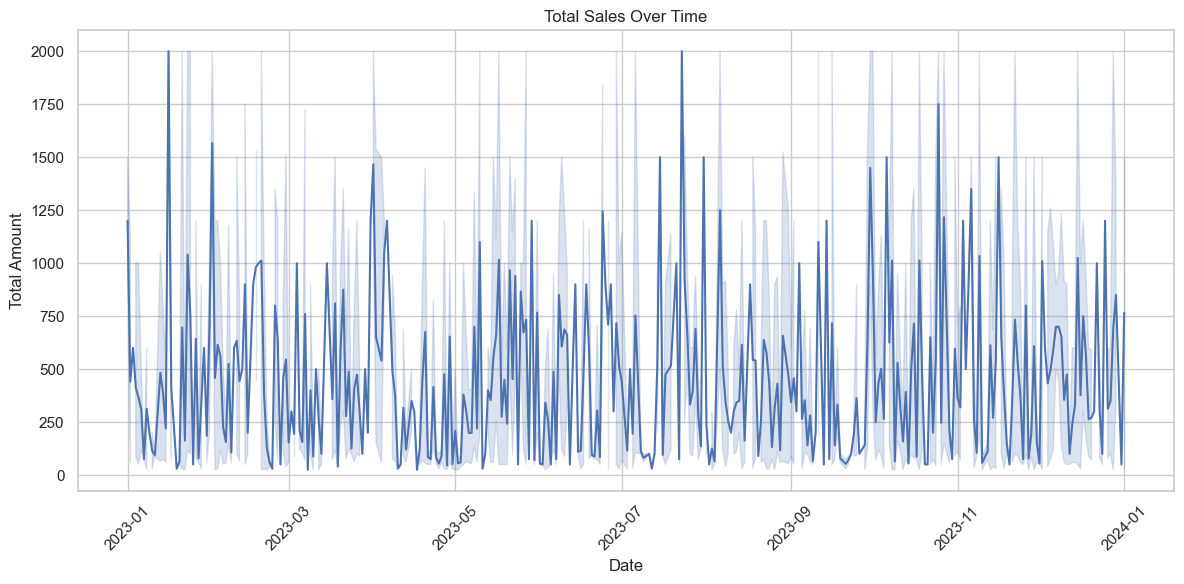

In [18]:
sns.set(style = "whitegrid")

# Total Sales Over Time
plt.figure(figsize = (12, 6))
sns.lineplot(x=data_cleaned['Date'], y=data_cleaned['Total Amount'], markers='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

- Description: This plot illustrates the total sales over time, showing how sales fluctuate on different dates.

**Output:
- A line graph depicting the relationship between the date and total amount sold.
- Key insights on sales peaks and troughs can be derived from the trends observed.


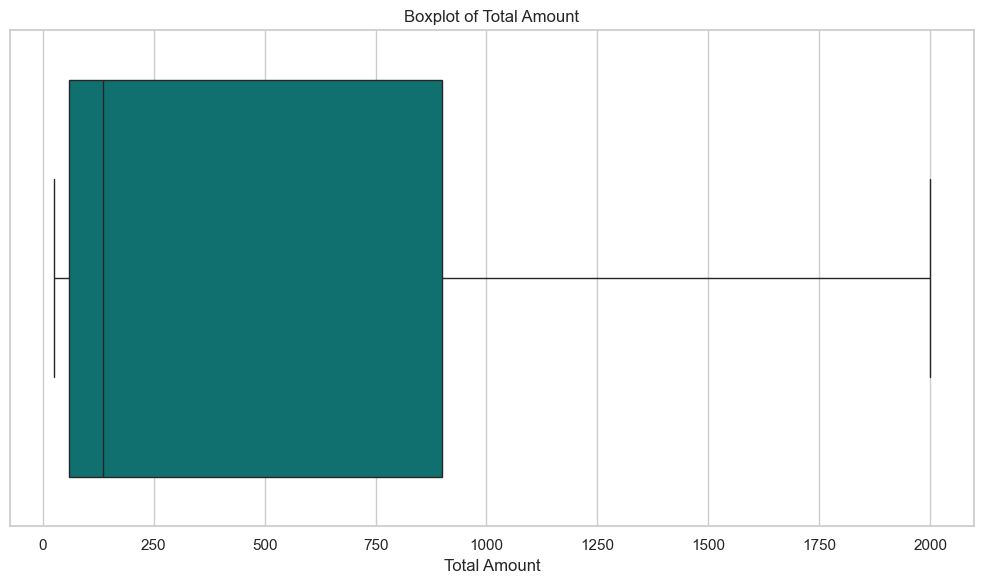

In [36]:
# Boxplot to Identify Outliers in Total Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['Total Amount'] ,color='teal')
plt.title('Boxplot of Total Amount')
plt.xlabel('Total Amount')
plt.tight_layout()
plt.show()


- Description: This boxplot is used to identify outliers in the total sales amount.

** Output:
- The boxplot displays the distribution of the total amount, highlighting the median, quartiles, and outliers.
- Outliers are identified visually, allowing for further investigation.


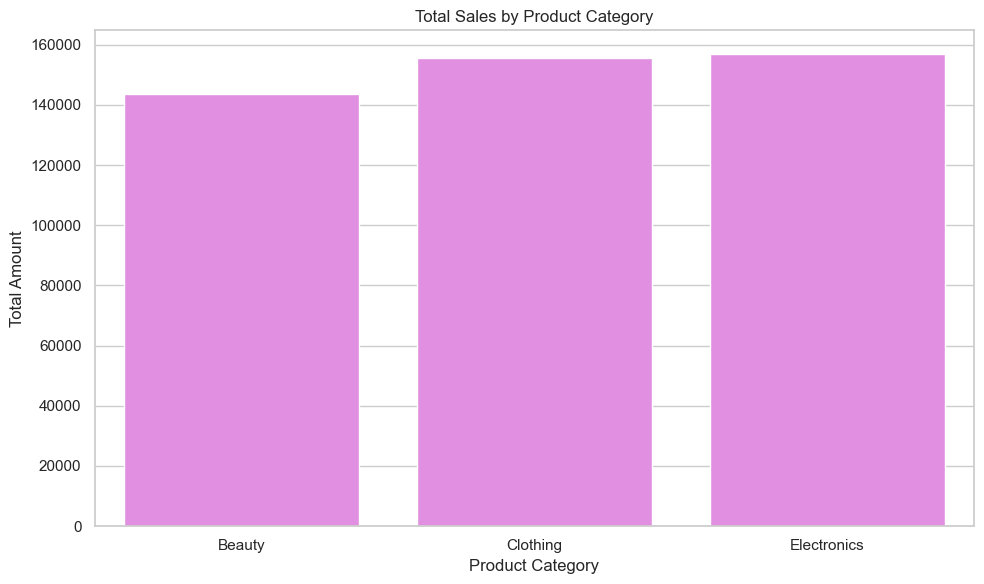

In [42]:
# Total Sales by Product Category
category_sales = data_cleaned.groupby('Product Category')['Total Amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=category_sales, color='violet')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()


- Description: This visualization shows total sales aggregated by product category.
** Output:
- A bar chart representing total sales for each product category.
**  output:
1. Beauty: $143,515
2. Clothing: $155,580
3. Electronics: $156,905


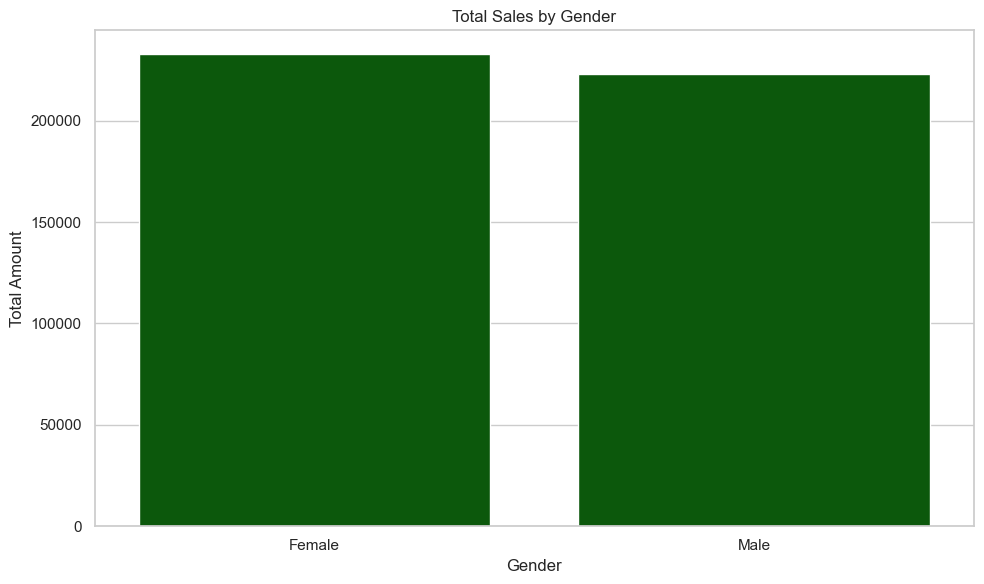

In [43]:
# 4. Total Sales by Gender
gender_sales = data_cleaned.groupby('Gender')['Total Amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Total Amount', data=gender_sales ,color='darkgreen')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()


- Description: This plot compares total sales based on customer gender.

** Output:
- A bar chart showing total sales for males and females.
- Insights into gender-based purchasing behavior can be derived.


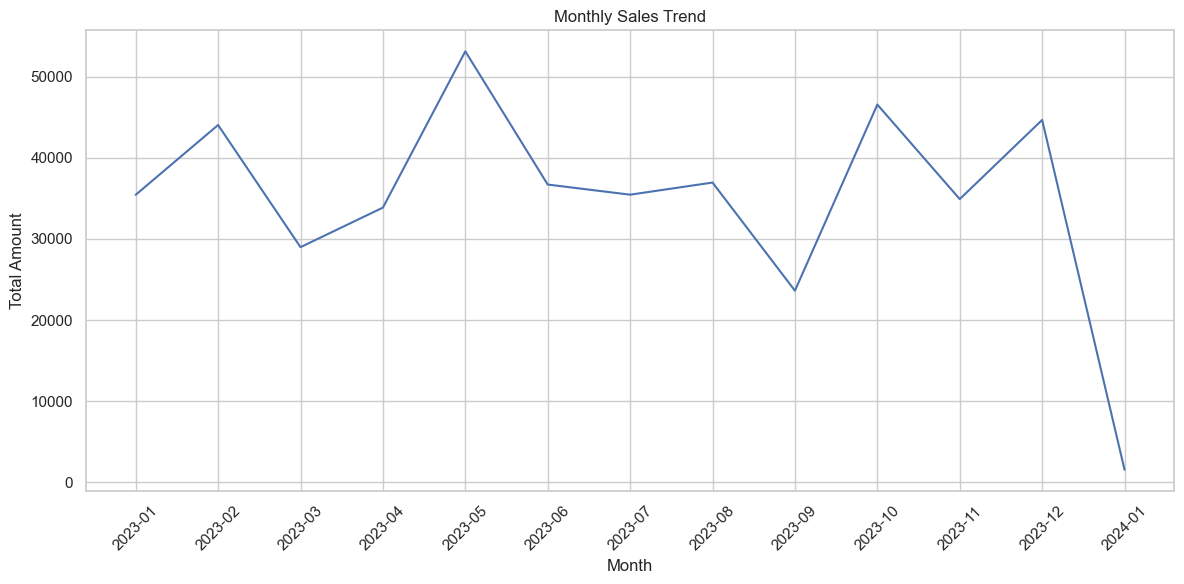

In [19]:
# Monthly Sales Trend
monthly_sales = data_cleaned.groupby('Month')['Total Amount'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str) # for converting periods to strings for plotting
plt.figure(figsize=(12,6))
sns.lineplot(x='Month' ,y='Total Amount', data=monthly_sales, markers='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

-  This visualization depicts the total sales trend on a monthly basis.
- A line graph showing the total amount sold for each month.
- Monthly trends can reveal seasonal patterns in sales.


C:\Users\Jaina\AppData\Local\Temp\ipykernel_19212\3949780941.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = data_cleaned.groupby('Age Group')['Total Amount'].sum().reset_index()


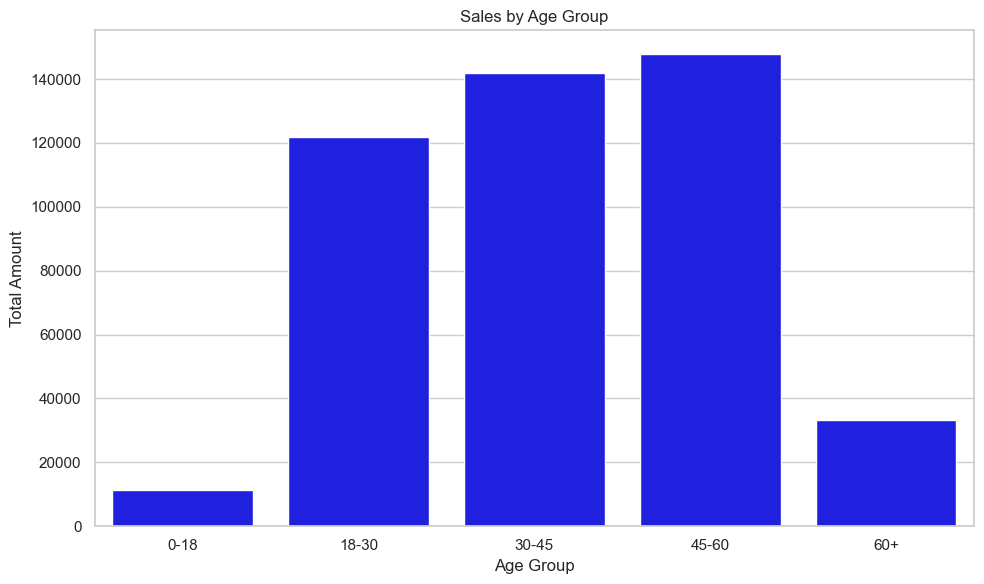

In [22]:
# Age Group Analysis
bins = [0,18,30,45,60,np.inf]
labels = ['0-18','18-30','30-45','45-60','60+']
data_cleaned['Age Group'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels)
age_group_sales = data_cleaned.groupby('Age Group')['Total Amount'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Age Group', y='Total Amount', data=age_group_sales, color='blue')
plt.title('Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

- Description: This visualization shows total sales segmented by age groups.


** Output:
A bar chart displaying sales across different age groups.
- 0-18: $X
- 18-30: $Y
- 30-45: $Z
- 45-60: $A
- 60+: $B


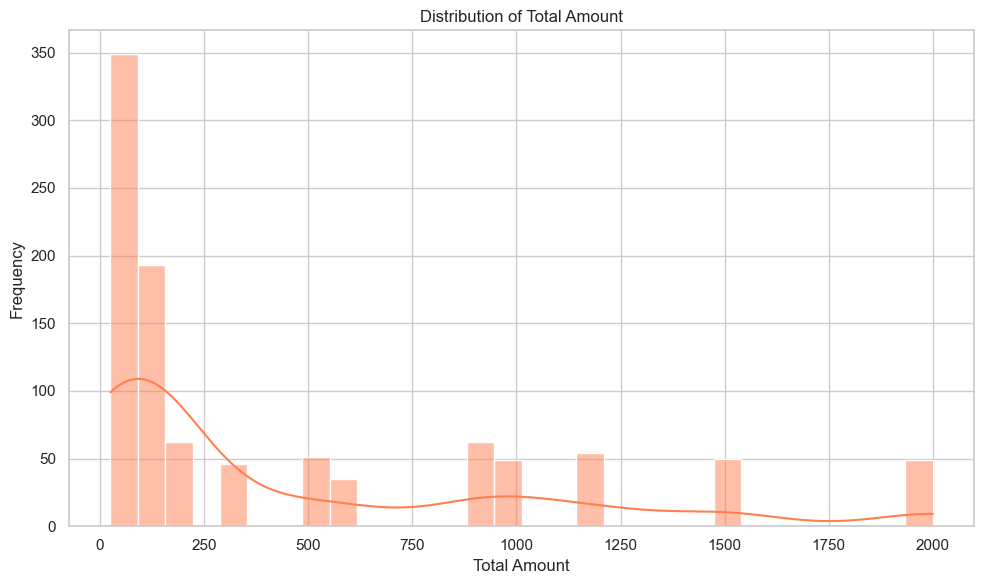

In [57]:
# Univariate Analysis
# Distribution of Total Amount
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['Total Amount'], kde=True , bins=30, color='coral')
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

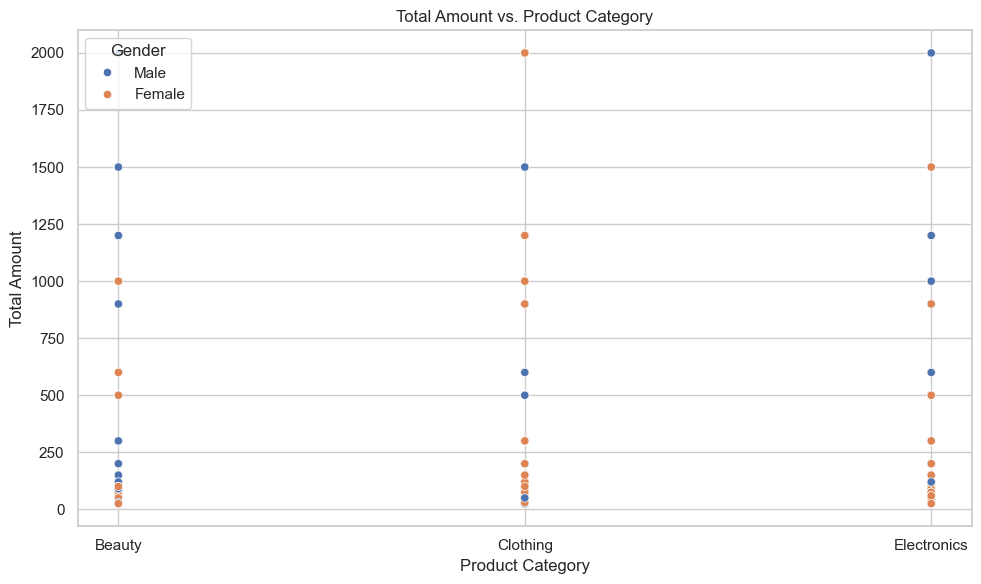

In [60]:
# Bivariate Analysis
# Total Amount vs Product Category
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['Product Category'], y=data_cleaned['Total Amount'], hue=data_cleaned['Gender'])
plt.title('Total Amount vs. Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()


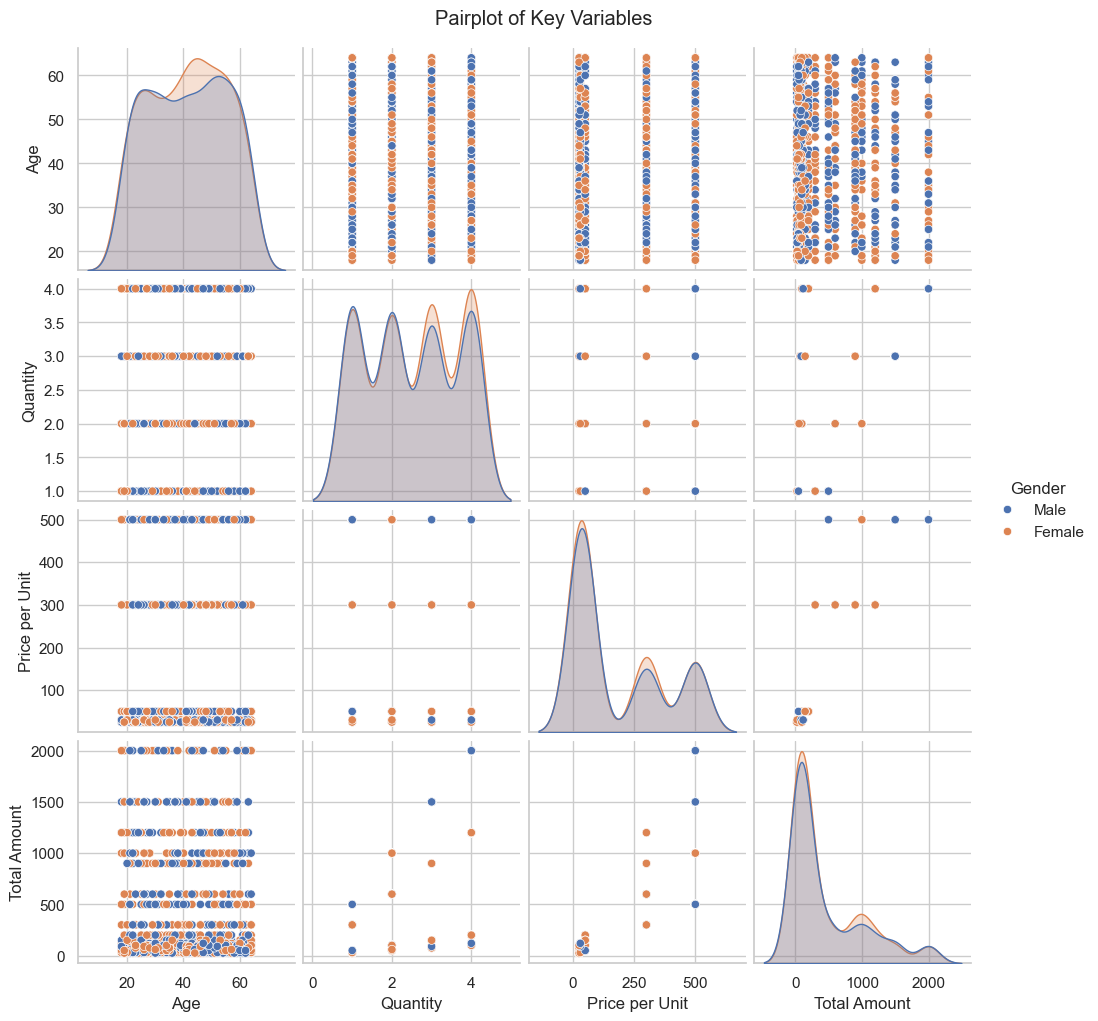

In [64]:
# Multivariate Analysis
# Pairplot
sns.pairplot(data_cleaned, hue='Gender', vars=['Age', 'Quantity', 'Price per Unit', 'Total Amount'])
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()


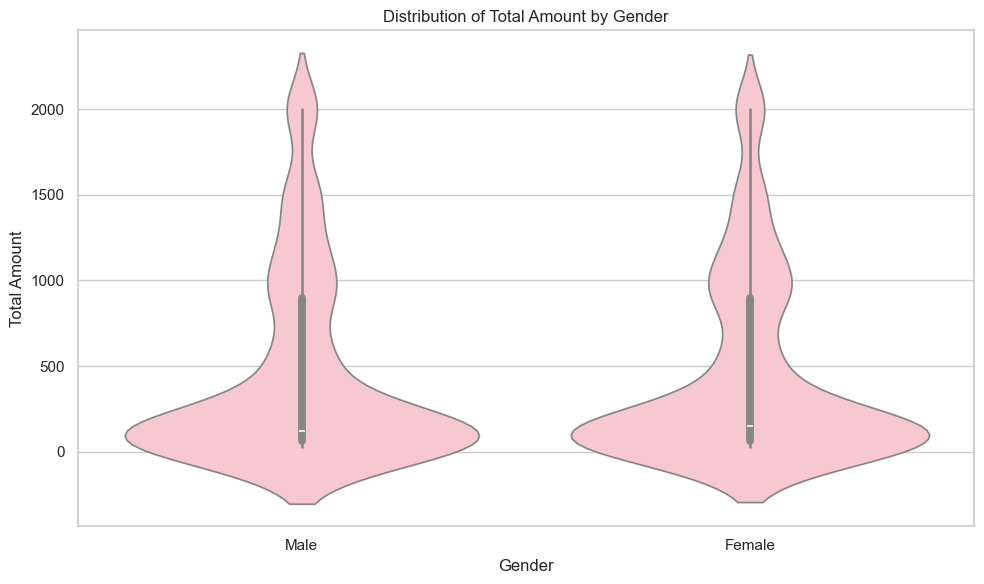

In [79]:
# Distribution of Total Amount by Gender using violin plot
plt.figure(figsize=(10,6))
sns.violinplot(x='Gender', y='Total Amount', data=data_cleaned , color='pink')
plt.title('Distribution of Total Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

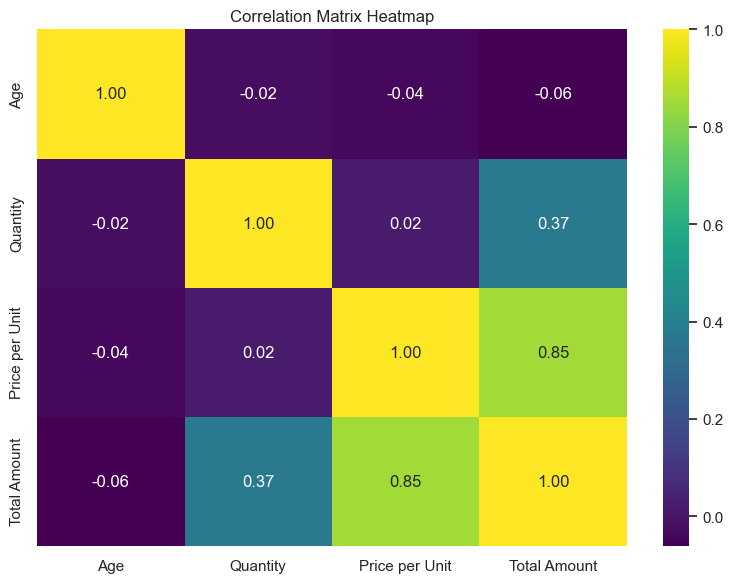

In [67]:
# Heatmap Correlation Matrix
corr_matrix = data_cleaned[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


In [87]:
# Descriptive Statistics
print("Total sales: {}".format(data_cleaned["Quantity"].sum()))
print("Total profit: {}".format(data_cleaned["Total Amount"].sum()))


Total sales: 2514
Total profit: 456000


### Advance Visualization

- Advanced visualizations include:

1. Heatmap Correlation Matrix: To analyze the correlation between different numerical features.
2. Boxenplot for Product Categories: To visualize sales distribution across product categories.
3. Time-Series Analysis: To analyze sales trends with rolling averages

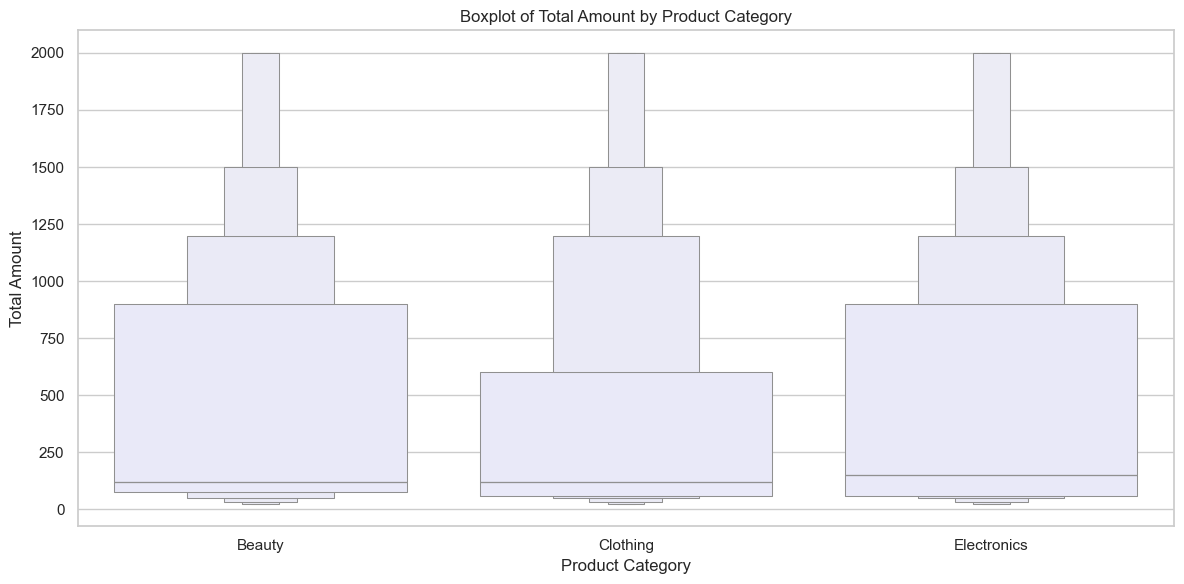

In [78]:
# Boxenplot for product categories
plt.figure(figsize=(12,6))
sns.boxenplot(x='Product Category', y='Total Amount', data=data_cleaned , color="lavender")
plt.title('Boxplot of Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

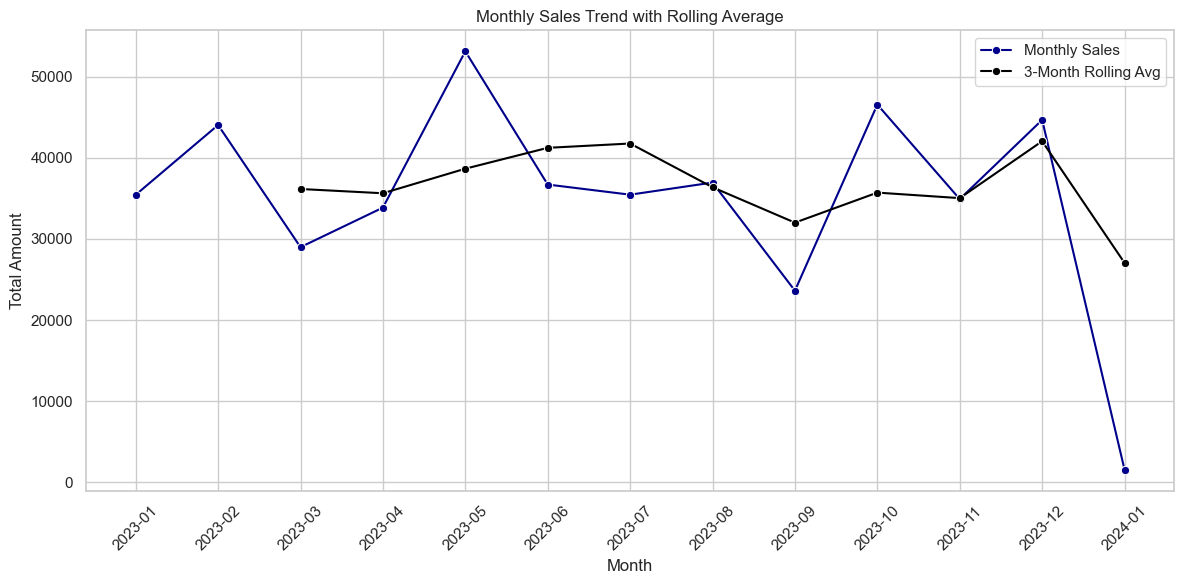

In [84]:
# Time-Series Analysis: Monthly Sales Trend with Rolling Average
monthly_sales['Rolling Avg'] = monthly_sales['Total Amount'].rolling(window=3).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Amount', data=monthly_sales, label='Monthly Sales', marker='o' , color = 'darkblue')
sns.lineplot(x='Month', y='Rolling Avg', data=monthly_sales, label='3-Month Rolling Avg', marker='o' ,color = 'black')
plt.title('Monthly Sales Trend with Rolling Average')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [89]:
print("mean average of total amount = {}".format(data_cleaned["Total Amount"].mean()))
print("median average of total amount = {}".format(data_cleaned["Total Amount"].median()))
print("mode of total amount = {}".format(data_cleaned["Total Amount"].mode()))


mean average of total amount = 456.0
median average of total amount = 135.0
mode of total amount = 0    50
Name: Total Amount, dtype: int64


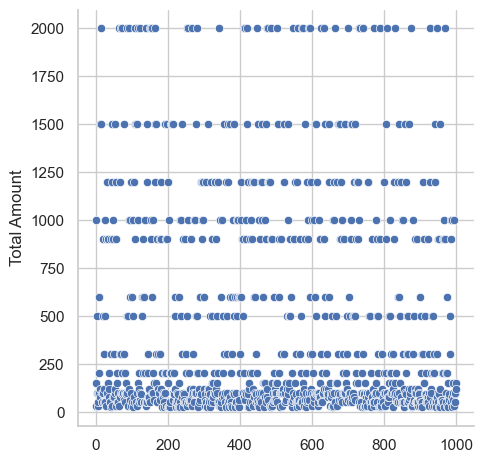

In [90]:
# Time Series Analysis
sns.relplot(data=data_cleaned['Total Amount'], kind='scatter')

In [91]:
grp = data_cleaned.groupby("Product Category")[["Quantity","Total Amount"]].sum()
print(grp)


                  Quantity  Total Amount
Product Category                        
Beauty                 771        143515
Clothing               894        155580
Electronics            849        156905


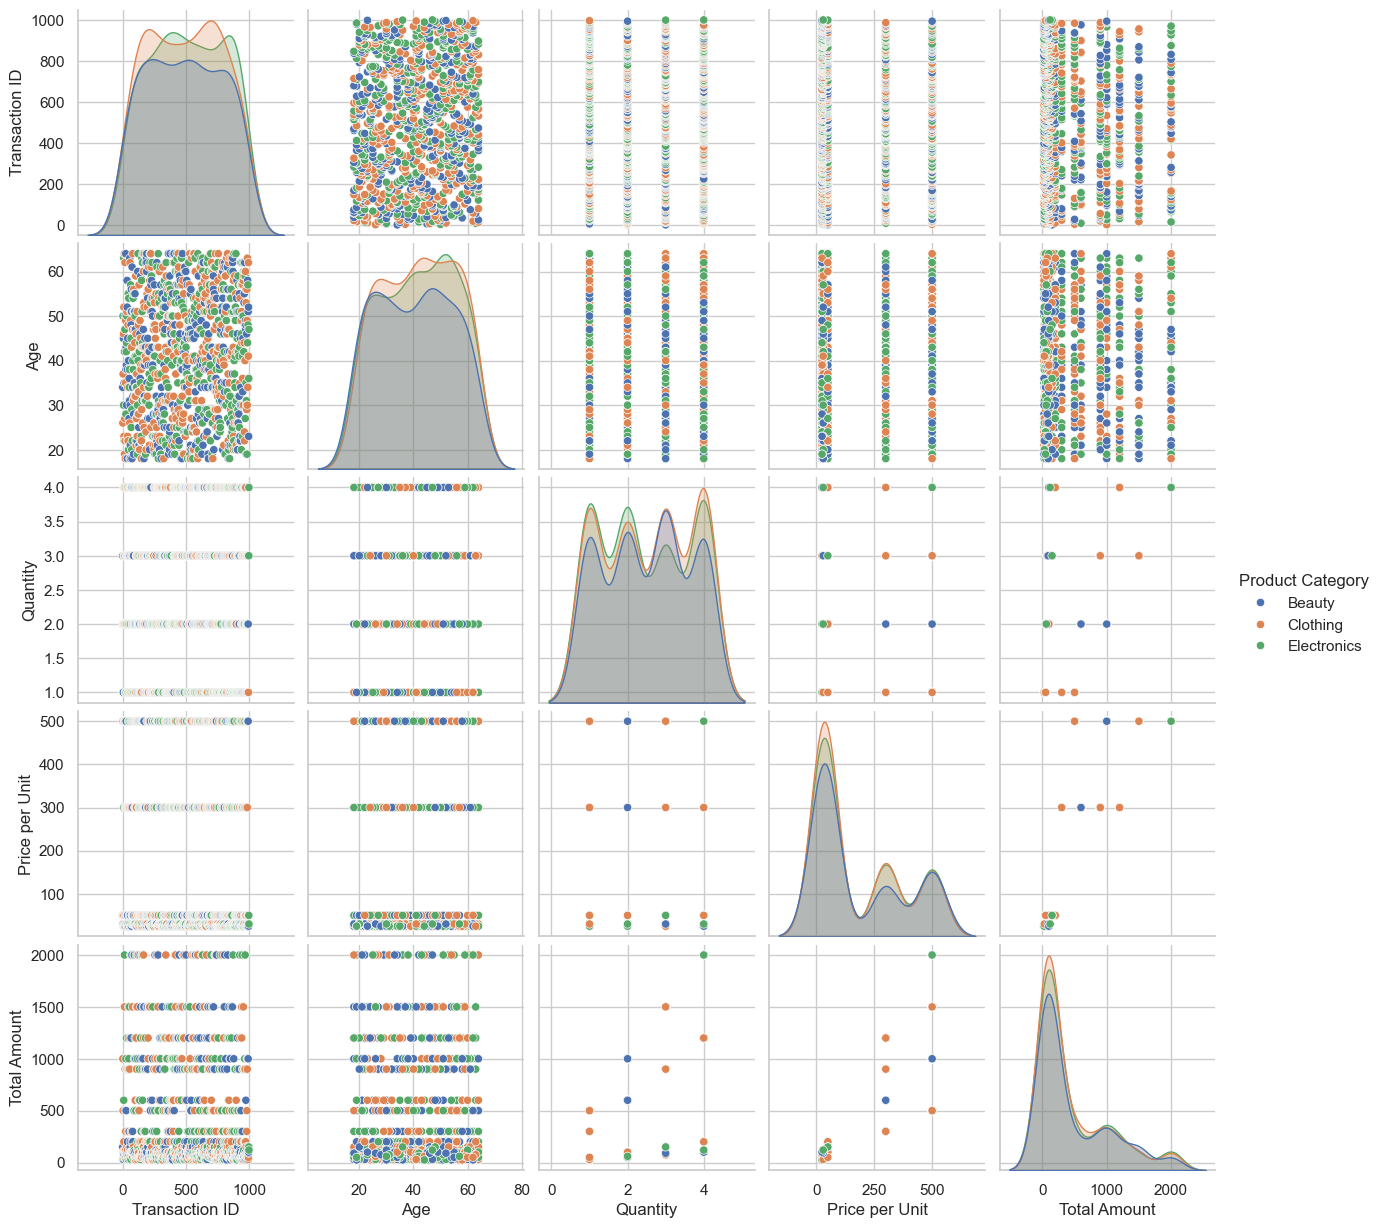

In [92]:
# Customer Product analysis
sns.pairplot(data=data_cleaned,hue="Product Category")


In [93]:
category_sales = data_cleaned["Product Category"].value_counts()
category_sales

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

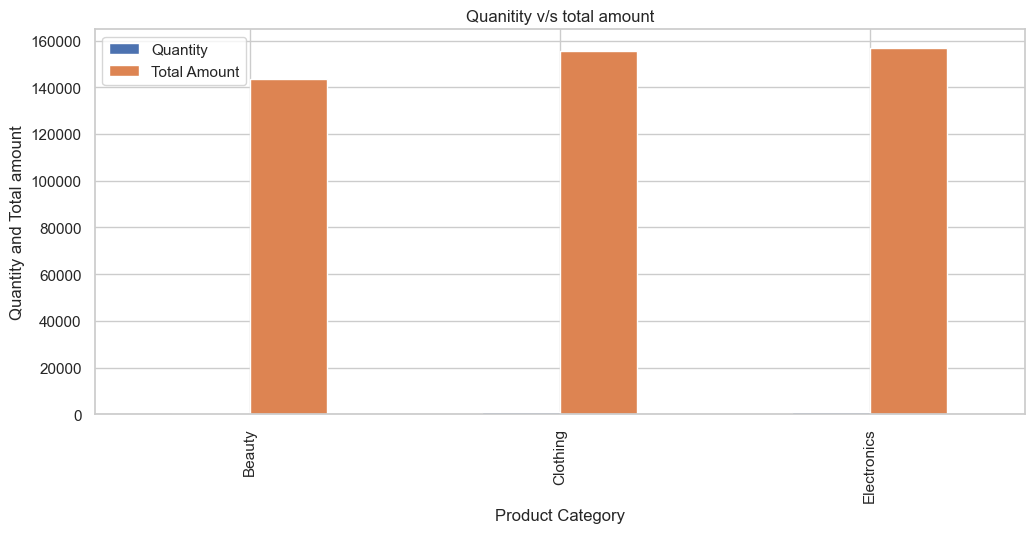

In [98]:
grp.plot(kind='bar',figsize=(12,5))
plt.title("Quanitity v/s total amount")
plt.ylabel("Quantity and Total amount")
plt.show()


In [100]:
data_cleaned["Price per Unit"].corr(data_cleaned["Total Amount"])


0.8519248403554025

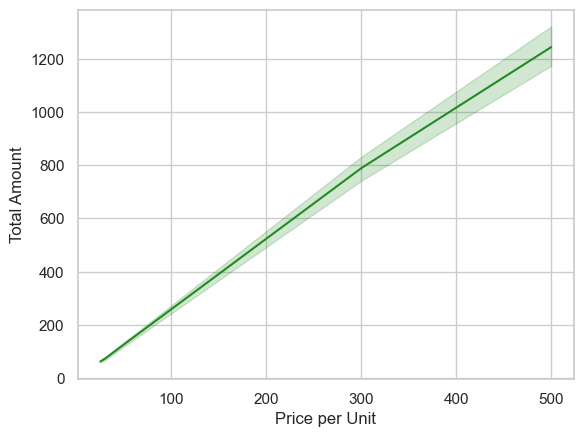

In [103]:
sns.lineplot(x="Price per Unit",y="Total Amount",data=data_cleaned, color = "forestgreen")
plt.show()


Key Insights and Conclusion

- The Retail Sales Analysis project provides valuable insights into sales patterns and customer demographics. By analyzing the dataset, one can identify:
1. Sales Trends: Understanding peak sales periods based on dates.
2. Customer Preferences: Analyzing which product categories are most popular among different genders and age groups.
3. Sales Performance: Evaluating total sales amounts to determine overall business performance.

- In conclusion, this project highlights the importance of data analysis in retail for informed decision-making, allowing businesses to tailor their strategies according to customer needs and market trends.
